

---
# **The Sparks Foundation**
---



## ***Data Science and Business Analytics Internship***
### ***Notebook by- Shounak Sushanta Dasgupta***
### **Task No. : 1**

#### **Problem Statement:** What will be predicted score if a student studies for 9.25 hr/day
#### **Simple Linear Regression:** In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns=None
pd.options.display.max_rows=None
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson
from sklearn.metrics import mean_absolute_error,mean_squared_error

#### Importing Dataset

In [2]:
df=pd.read_csv("http://bit.ly/w-data")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df1=df.copy()

#### Dataset Description

In [4]:
print(f"The dimensions of dataset are {df1.shape}")

The dimensions of dataset are (25, 2)


In [5]:
print(f"The Information about dataset is given below\n\n")
print(df1.info())

The Information about dataset is given below


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None


In [6]:
print(f"The 5 point statistical summary of the dataste\n\n{df1.describe().transpose()}")

The 5 point statistical summary of the dataste

        count    mean        std   min   25%   50%   75%   max
Hours    25.0   5.012   2.525094   1.1   2.7   4.8   7.4   9.2
Scores   25.0  51.480  25.286887  17.0  30.0  47.0  75.0  95.0


In [7]:
print(f"The percentage null values in the table\n\n{df1.isnull().sum()/len(df1)*100}")

The percentage null values in the table

Hours     0.0
Scores    0.0
dtype: float64


#### Relationship between the Independent and Dependent Variable

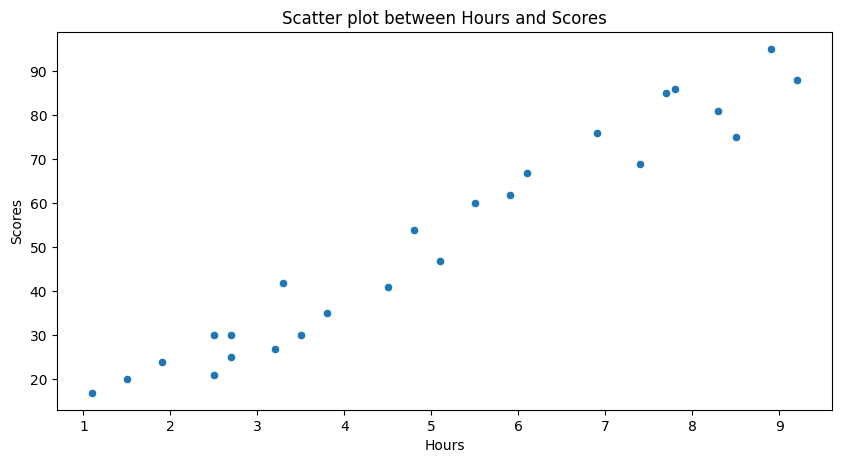

By observing the above graph we can infer that the relation between the scores and hours is linear.


In [8]:
plt.figure(figsize=(10,5),dpi=100)
sns.scatterplot(x="Hours",y="Scores",data=df1)
plt.title("Scatter plot between Hours and Scores")
plt.show()
print("By observing the above graph we can infer that the relation between the scores and hours is linear.")

#### Data Preperation

In [9]:
X=pd.DataFrame(df1.iloc[:,0])
y=df1.iloc[:,-1].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Training the Algorithm

In [11]:
LR=LinearRegression()
linreg=LR.fit(X_train,y_train)

#### Regression Line

In [12]:
line=linreg.intercept_+linreg.coef_*X

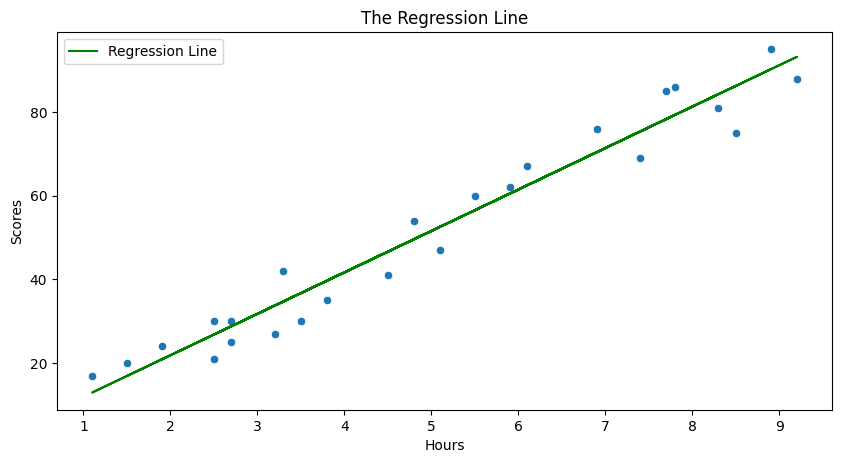

In [13]:
plt.figure(figsize=(10,5),dpi=100)
sns.scatterplot(x="Hours",y="Scores",data=df1)
plt.plot(X,line,color="green",label="Regression Line")
plt.title("The Regression Line")
plt.legend()
plt.show()

#### Making Prediction

In [14]:
y_hat_train=linreg.predict(X_train)
y_hat_test=linreg.predict(X_test)

#### Distribution of Residual

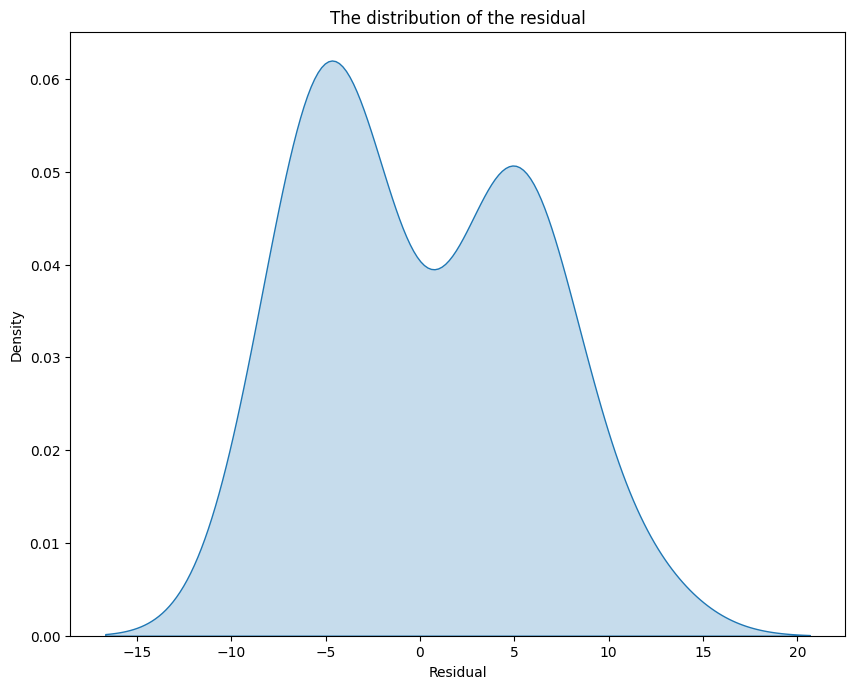

The Residual do follow the normal distribution in above KDE plot


In [15]:
residual=y_hat_train-y_train
residual=pd.DataFrame({"residual":residual})
plt.figure(figsize=(10,8),dpi=100)
sns.kdeplot(data=residual,x='residual',shade=True)
plt.xlabel("Residual")
plt.ylabel("Density")
plt.title("The distribution of the residual")
plt.show()
print("The Residual do follow the normal distribution in above KDE plot")

#### Prediction for the input data

In [16]:
hours=float(input("Enter the number of hours studied per day:"))
marks=linreg.predict(np.array(hours).reshape(-1,1))
print(f"The marks obtained for studying {hours} per day is {marks[0]:0.2f}")

Enter the number of hours studied per day:9.25
The marks obtained for studying 9.25 per day is 93.69


#### Model Evaluation

In [17]:
MAD_train=mean_absolute_error(y_train,y_hat_train)
MSE_train=mean_squared_error(y_train,y_hat_train)
RMSE_train=math.sqrt(MSE_train)
print(f"The performance metrics for train data are as follows\nMAD={MAD_train:0.2f}\nMSE={MSE_train:0.2f}\nRMSE={RMSE_train:0.2f}")

The performance metrics for train data are as follows
MAD=5.19
MSE=30.90
RMSE=5.56


In [18]:
MAD_test=mean_absolute_error(y_test,y_hat_test)
MSE_test=mean_squared_error(y_test,y_hat_test)
RMSE_test=math.sqrt(MSE_test)
print(f"The performance metrics for train data are as follows\nMAD={MAD_test:0.2f}\nMSE={MSE_test:0.2f}\nRMSE={RMSE_test:0.2f}")

The performance metrics for train data are as follows
MAD=4.18
MSE=21.60
RMSE=4.65


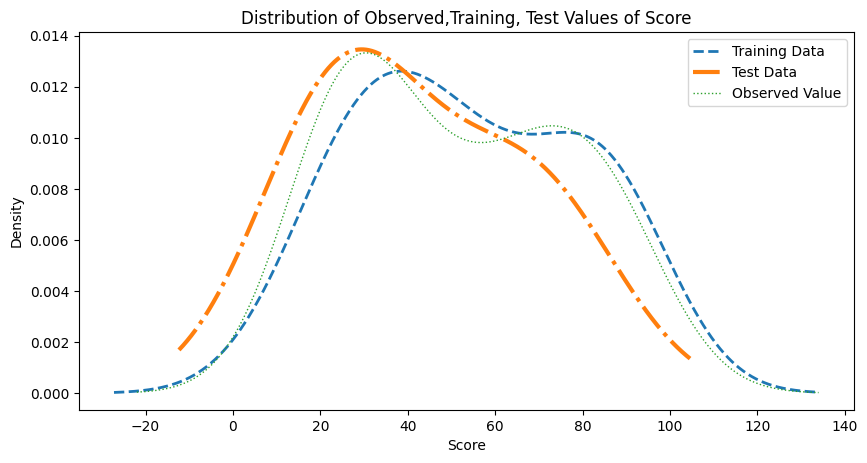

The model is a very fit to observed values. As we can see Model performance parameters are almost same


In [19]:
plt.figure(figsize=(10,5),dpi=100)
pd.Series(y_hat_train).sort_values().plot(kind='kde',label="Training Data",ls="--",lw=2)
pd.Series(y_hat_test).sort_values().plot(kind='kde',label="Test Data",ls="-.",lw=3)
pd.Series(y).sort_values().plot(kind='kde',label="Observed Value",ls=":",lw=1)
plt.ylabel("Density")
plt.xlabel("Score")
plt.title("Distribution of Observed,Training, Test Values of Score")
plt.legend()
plt.show()
print("The model is a very fit to observed values. As we can see Model performance parameters are almost same")